In [1]:
# Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem

In [13]:
# Import Data
usage_df = pd.read_csv('cleaned_device_data.csv')
usage_df.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency,EnergyConsumptionHR
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1,0.128149
1,2,Camera,19.973343,8.610689,1,0,29,1,0.431109
2,3,Security System,18.911535,2.651777,1,0,20,1,0.140220
3,4,Camera,7.011127,2.341653,0,3,15,0,0.333991
4,5,Camera,22.610684,4.859069,1,3,36,1,0.214901


In [15]:
# Dataframe for Camera only
camera_df = usage_df[usage_df["DeviceType"]=="Camera"]
# camera_df["DeviceType"].unique()
# camera_df.head()

In [17]:
# Dataframe for Lights only
lights_df = usage_df[usage_df["DeviceType"]=="Lights"]
# lights_df["DeviceType"].unique()
# lights_df.head()

In [19]:
# Dataframe for Security System only
security_df = usage_df[usage_df["DeviceType"]=="Security System"]
# security_df["DeviceType"].unique()
# security_df.head()

In [21]:
# Dataframe for Smart Speaker only
speaker_df = usage_df[usage_df["DeviceType"]=="Smart Speaker"]
# speaker_df["DeviceType"].unique()
# speaker_df.head()

In [23]:
# Dataframe for Thermostat only
thermostat_df = usage_df[usage_df["DeviceType"]=="Thermostat"]
# thermostat_df["DeviceType"].unique()
# thermostat_df.head()

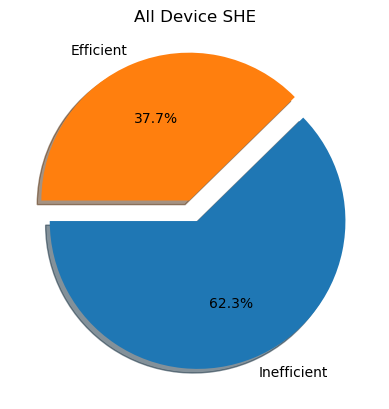

In [45]:
# Pie Chart / Split for: ALL DEVICE
allcounts = usage_df["SmartHomeEfficiency"].value_counts()
# allcounts

labels = ["Inefficient", "Efficient"]
explode = (0.05, 0.10)
plt.pie(allcounts.values, labels=labels, autopct="%1.1f%%", explode=explode, shadow=True, startangle=180)
plt.title("All Device SHE")
plt.ylabel("")

plt.savefig("./output/All Device SHE.png")

plt.show()



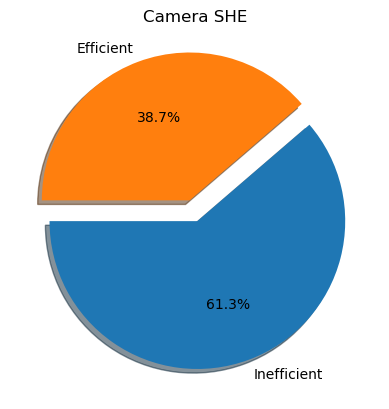

In [47]:
# Pie Chart / Split for: Camera only
cameracounts = camera_df["SmartHomeEfficiency"].value_counts()
# cameracounts

labels = ["Inefficient", "Efficient"]
explode = (0.05, 0.10)
plt.pie(cameracounts.values, labels=labels, autopct="%1.1f%%", explode=explode, shadow=True, startangle=180)
plt.ylabel("")
plt.title("Camera SHE")
plt.savefig("./output/Camera SHE.png")
plt.show()



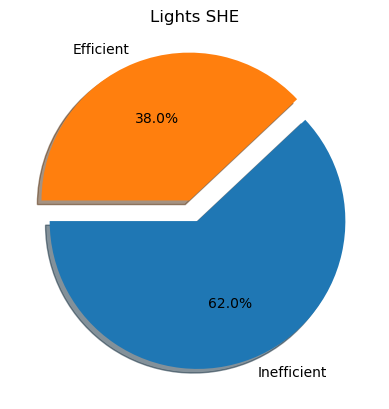

In [57]:
# Pie Chart / Split for: Lights
lightscounts = lights_df["SmartHomeEfficiency"].value_counts()
# lightscounts

labels = ["Inefficient", "Efficient"]
explode = (0.05, 0.10)
plt.pie(lightscounts.values, labels=labels, autopct="%1.1f%%", explode=explode, shadow=True, startangle=180)
plt.ylabel("")
plt.title("Lights SHE")
plt.savefig("./output/Lights SHE.png")
plt.show()


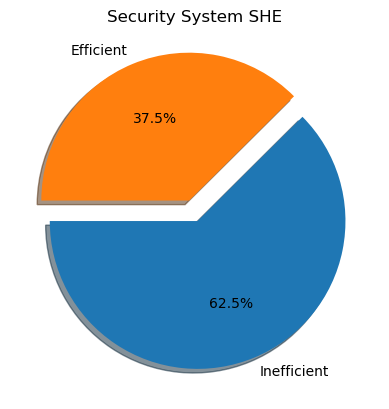

In [49]:
# Pie Chart / Split for: Security System
securitycounts = security_df["SmartHomeEfficiency"].value_counts()
# securitycounts

labels = ["Inefficient", "Efficient"]
explode = (0.05, 0.10)
plt.pie(securitycounts.values, labels=labels, autopct="%1.1f%%", explode=explode, shadow=True, startangle=180)
plt.title("Security System SHE")
plt.ylabel("")
plt.savefig("./output/Security System SHE.png")
plt.show()


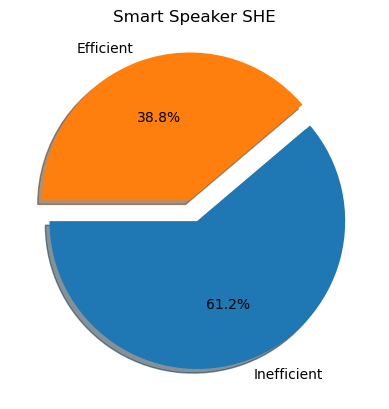

In [53]:
# Pie Chart / Split for: Smart Speaker
speakercounts = speaker_df["SmartHomeEfficiency"].value_counts()
# speakercounts

labels = ["Inefficient", "Efficient"]
explode = (0.05, 0.10)
plt.pie(speakercounts.values, labels=labels, autopct="%1.1f%%", explode=explode, shadow=True, startangle=180)
plt.title("Smart Speaker SHE")
plt.ylabel("")
plt.savefig("./output/Smart Speaker SHE.png")
plt.show()



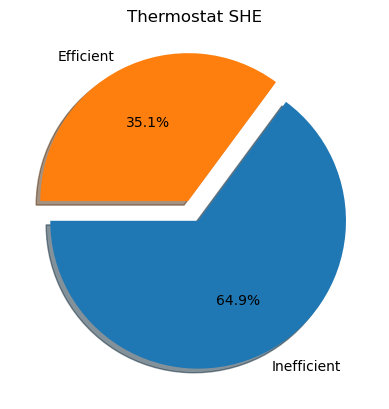

In [51]:
# Pie Chart / Split for: Thermostat
thermostatcounts = thermostat_df["SmartHomeEfficiency"].value_counts()
# thermostatcounts

labels = ["Inefficient", "Efficient"]
explode = (0.05, 0.10)
plt.pie(thermostatcounts.values, labels=labels, autopct="%1.1f%%", explode=explode, shadow=True, startangle=180)
plt.title("Thermostat SHE")
plt.ylabel("")
plt.savefig("./output/Thermostat SHE.png")
plt.show()



In [61]:
# treatments
devices = ["Camera", "Smart Speaker", "Security System", "Thermostat", "Lights"]

# Create empty list to fill with data (for plotting)
uhpd_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for device in devices:

    # Locate the rows which contain device per datapoint
    uhpd = usage_df.loc[usage_df["DeviceType"] == device, "UsageHoursPerDay"]
    
    # add subset
    uhpd_data.append(uhpd)
   

    # Determine outliers using upper and lower bounds
    quartiles = uhpd.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = uhpd.loc[(uhpd < lower_bound) | (uhpd > upper_bound)]
    # print(outliers)
    # print(f"{drug}'s potential outliers {outliers}")

In [63]:
# devices_data

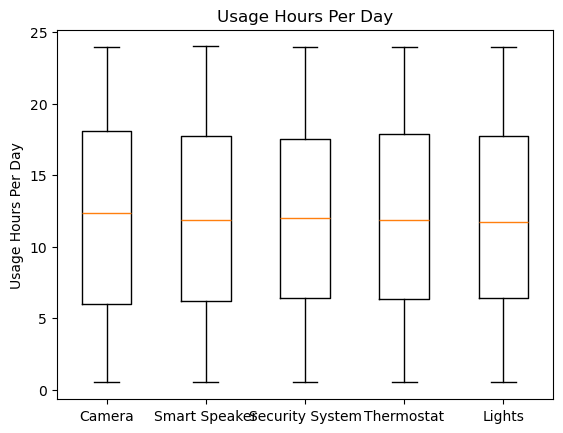

In [92]:
# Generate a box plot that shows the distribution
outlier_format = dict(markerfacecolor='red', markersize=10)
plt.boxplot(uhpd_data, labels=devices , flierprops=outlier_format)
plt.ylabel("Usage Hours Per Day")
plt.title("Usage Hours Per Day")
plt.savefig("./output/UHPD boxplots.png")
plt.show()

In [67]:
devices = ["Camera", "Smart Speaker", "Security System", "Thermostat", "Lights"]

# Create empty list to fill with data (for plotting)
echr_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for device in devices:

    # Locate the rows which contain device per datapoint
    echr = usage_df.loc[usage_df["DeviceType"] == device, "EnergyConsumptionHR"]
    
    # add subset
    echr_data.append(echr)

    # Determine outliers using upper and lower bounds
    quartiles = echr.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = echr.loc[(echr < lower_bound) | (echr > upper_bound)]
    # print(outliers)
    # print(f"{drug}'s potential outliers {outliers}")

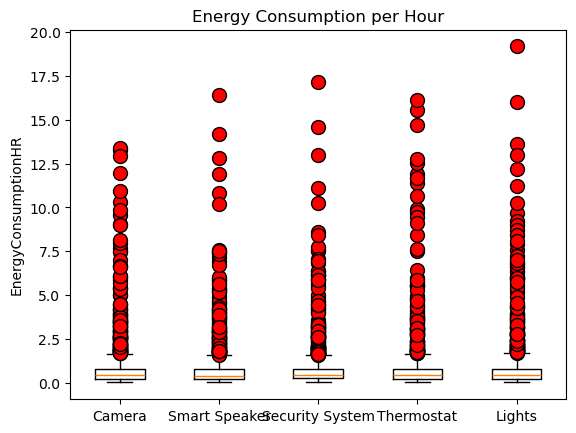

In [98]:
# Generate a box plot that shows the distribution
outlier_format = dict(markerfacecolor='red', markersize=10)
plt.boxplot(echr_data, labels=devices , flierprops=outlier_format)
plt.ylabel("EnergyConsumptionHR")
plt.title("Energy Consumption per Hour")
plt.savefig("./output/ECHR boxplots.png")
plt.show()

In [70]:
# HISTOGRAM for above to better understand outliers and distribution...


In [73]:
devices = ["Camera", "Smart Speaker", "Security System", "Thermostat", "Lights"]

# Create empty list to fill with data (for plotting)
dam_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for device in devices:

    # Locate the rows which contain device per datapoint
    dam = usage_df.loc[usage_df["DeviceType"] == device, "DeviceAgeMonths"]
    
    # add subset
    dam_data.append(dam)

    # Determine outliers using upper and lower bounds
    quartiles = dam.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = dam.loc[(dam < lower_bound) | (dam > upper_bound)]
    print(outliers)
    # print(f"{drug}'s potential outliers {outliers}")

Series([], Name: DeviceAgeMonths, dtype: int64)
Series([], Name: DeviceAgeMonths, dtype: int64)
Series([], Name: DeviceAgeMonths, dtype: int64)
Series([], Name: DeviceAgeMonths, dtype: int64)
Series([], Name: DeviceAgeMonths, dtype: int64)


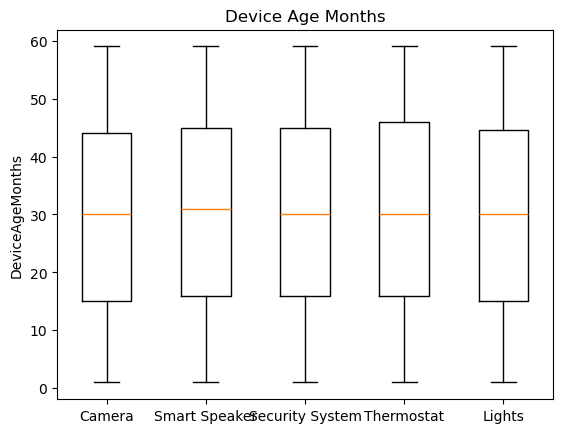

In [100]:
# Generate a box plot that shows the distribution
outlier_format = dict(markerfacecolor='red', markersize=10)
plt.boxplot(dam_data, labels=devices , flierprops=outlier_format)
plt.ylabel("DeviceAgeMonths")
plt.title("Device Age Months")
plt.savefig("./output/DAM boxplots.png")
plt.show()

In [77]:
# Use groupby and summary statistical methods to calculate the following properties :
# mean, median, variance, standard deviation, and SEM.  UsageHoursPerDay
uhpd_means = usage_df.groupby("DeviceType").mean(numeric_only=True)["UsageHoursPerDay"]
# means
uhpd_medians = usage_df.groupby("DeviceType").median(numeric_only=True)["UsageHoursPerDay"]
# medians
uhpd_variances = usage_df.groupby("DeviceType").var(numeric_only=True)["UsageHoursPerDay"]
# variances
uhpd_stddevs = usage_df.groupby("DeviceType").std(numeric_only=True)["UsageHoursPerDay"]
# stddevs
uhpd_SEMs = usage_df.groupby("DeviceType").sem(numeric_only=True)["UsageHoursPerDay"]
# SEMs

In [79]:
# Assemble the resulting series into a single summary DataFrame.
pd.DataFrame({"Mean UHPD": uhpd_means,
              "Median UHPD": uhpd_medians,
              "Variance UHPD": uhpd_variances,
              "StandardDev UHPD": uhpd_stddevs,
              "StandardErr UHPD": uhpd_SEMs })

,Mean UHPD,Median UHPD,Variance UHPD,StandardDev UHPD,StandardErr UHPD
DeviceType,,,,,
Camera,12.113435,12.325680,46.974521,6.853796,0.206556
Lights,12.052646,11.683799,44.671638,6.683684,0.202722
Security System,12.016149,11.985630,44.407794,6.663917,0.203913
Smart Speaker,11.979308,11.832181,44.596962,6.678096,0.200624
Thermostat,12.105753,11.838587,44.921235,6.702331,0.207930


In [81]:
# Use groupby and summary statistical methods to calculate the following properties :
# mean, median, variance, standard deviation, and SEM.  UsageHoursPerDay
echr_means = usage_df.groupby("DeviceType").mean(numeric_only=True)["EnergyConsumptionHR"]
# means
echr_medians = usage_df.groupby("DeviceType").median(numeric_only=True)["EnergyConsumptionHR"]
# medians
echr_variances = usage_df.groupby("DeviceType").var(numeric_only=True)["EnergyConsumptionHR"]
# variances
echr_stddevs = usage_df.groupby("DeviceType").std(numeric_only=True)["EnergyConsumptionHR"]
# stddevs
echr_SEMs = usage_df.groupby("DeviceType").sem(numeric_only=True)["EnergyConsumptionHR"]
# SEMs

In [83]:
# Assemble the resulting series into a single summary DataFrame.
pd.DataFrame({"Mean ECHR": echr_means,
              "Median ECHR": echr_medians,
              "Variance ECHR": echr_variances,
              "StandardDev ECHR": echr_stddevs,
              "StandardError ECHR": echr_SEMs })

,Mean ECHR,Median ECHR,Variance ECHR,StandardDev ECHR,StandardError ECHR
DeviceType,,,,,
Camera,0.846319,0.420039,2.121283,1.456462,0.043894
Lights,0.870819,0.427182,2.582725,1.607086,0.048744
Security System,0.817792,0.424731,1.947531,1.395540,0.042703
Smart Speaker,0.792016,0.400905,1.905191,1.380286,0.041467
Thermostat,0.856817,0.413202,2.568316,1.602597,0.049718


In [85]:
# Use groupby and summary statistical methods to calculate the following properties :
# mean, median, variance, standard deviation, and SEM.  UsageHoursPerDay
dam_means = usage_df.groupby("DeviceType").mean(numeric_only=True)["DeviceAgeMonths"]
# means
dam_medians = usage_df.groupby("DeviceType").median(numeric_only=True)["DeviceAgeMonths"]
# medians
dam_variances = usage_df.groupby("DeviceType").var(numeric_only=True)["DeviceAgeMonths"]
# variances
dam_stddevs = usage_df.groupby("DeviceType").std(numeric_only=True)["DeviceAgeMonths"]
# stddevs
dam_SEMs = usage_df.groupby("DeviceType").sem(numeric_only=True)["DeviceAgeMonths"]
# SEMs

In [87]:
# Assemble the resulting series into a single summary DataFrame.
pd.DataFrame({"Mean DAM": dam_means,
              "Median DAM": dam_medians,
              "Variance DAM": dam_variances,
              "StandardDev DAM": dam_stddevs,
              "StandardError DAM": dam_SEMs })

,Mean DAM,Median DAM,Variance DAM,StandardDev DAM,StandardError DAM
DeviceType,,,,,
Camera,30.035422,30.0,287.283290,16.949433,0.510813
Lights,29.912603,30.0,290.582594,17.046483,0.517035
Security System,30.485955,30.0,283.262221,16.830396,0.515002
Smart Speaker,30.593863,31.0,291.847550,17.083546,0.513225
Thermostat,30.544755,30.0,291.043997,17.060012,0.529263
